<a href="https://colab.research.google.com/github/vsmataev/notebooks/blob/main/%D0%A1%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%804_%D0%94%D0%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 1.1. Скачать следующие данные: kc-house-data
* 1.2. Изучите стоимость недвижимости
* 1.3. Изучите распределение квадратуры жилой площади
* 1.4. Изучите распределение года постройки

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
# Настройка отображения для избежания научной нотации
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kc_house_data.csv')
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


Оценка стоимости недвижимости (price)

In [42]:

def analyze_column(dataframe, column_name):
    # Вычисление основных статистических показателей
    summary = dataframe[column_name].describe()

    # 95% доверительный интервал для медианы
    median_ci = np.percentile(dataframe[column_name], [2.5, 97.5])

    # Вывод результатов
    print(f"Описательные статистики для столбца '{column_name}':")
    print(summary)
    print("95% доверительный интервал для медианы:", median_ci)

    # тест Колмогорова-Смирнова
    statistic, p_value = stats.kstest(dataframe[column_name], 'norm')


    print("Статистика теста:", statistic)
    print("Значимость:", p_value)

    # Проверка на нормальность
    alpha = 0.05
    if p_value > alpha:
        print("Распределение признака похоже на нормальное")
    else:
        print("Распределение признака не похоже на нормальное")

analyze_column(df, 'price')

Описательные статистики для столбца 'price':
count     21613.00
mean     540088.14
std      367127.20
min       75000.00
25%      321950.00
50%      450000.00
75%      645000.00
max     7700000.00
Name: price, dtype: float64
95% доверительный интервал для медианы: [ 185000. 1485000.]
Статистика теста: 1.0
Значимость: 0.0
Распределение признака не похоже на нормальное


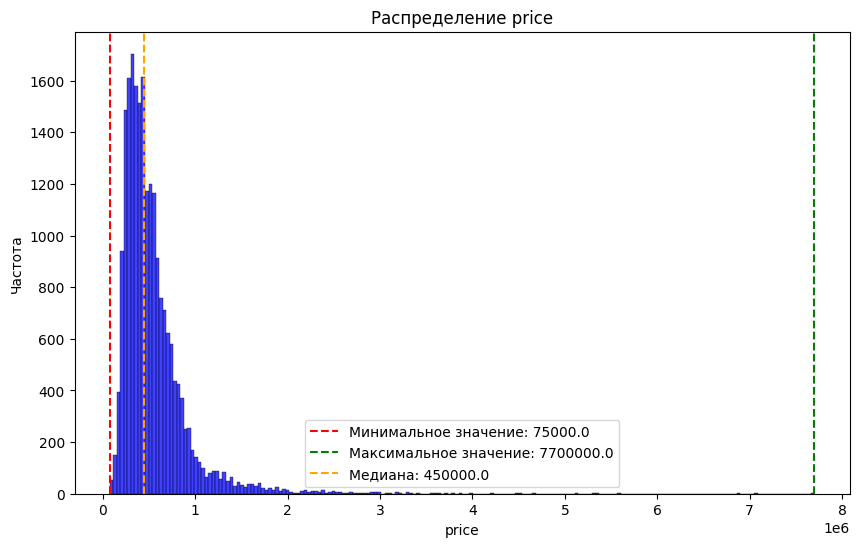

In [47]:

def plot_distribution(column, bins=200):
    """
    Построение гистограммы распределения с указанием диапазона и медианы.

    Параметры:
        column (Series): Столбец данных для построения гистограммы.
    """
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(column, kde=False, color='blue', bins=bins)  # Используем переданный столбец
    plt.title('Распределение ' + column.name)  # Используем имя столбца в заголовке
    plt.xlabel(column.name)  # Используем имя столбца на оси X
    plt.ylabel('Частота')

    # Диапазон значений на графике
    min_value = column.min()
    max_value = column.max()
    plt.axvline(x=min_value, color='red', linestyle='--', label=f'Минимальное значение: {min_value}')
    plt.axvline(x=max_value, color='green', linestyle='--', label=f'Максимальное значение: {max_value}')

    # Медиана на графике
    median_value = column.median()
    plt.axvline(x=median_value, color='orange', linestyle='--', label=f'Медиана: {median_value}')

    plt.legend()
    plt.show()

# Пример использования функции
plot_distribution(df['price'])

**распределение квадратуры жилой площади (sqft_living)**

Описательные статистики для столбца 'sqft_living':
count   21613.00
mean     2079.90
std       918.44
min       290.00
25%      1427.00
50%      1910.00
75%      2550.00
max     13540.00
Name: sqft_living, dtype: float64
95% доверительный интервал для медианы: [ 820. 4270.]
Статистика теста: 1.0
Значимость: 0.0
Распределение признака не похоже на нормальное


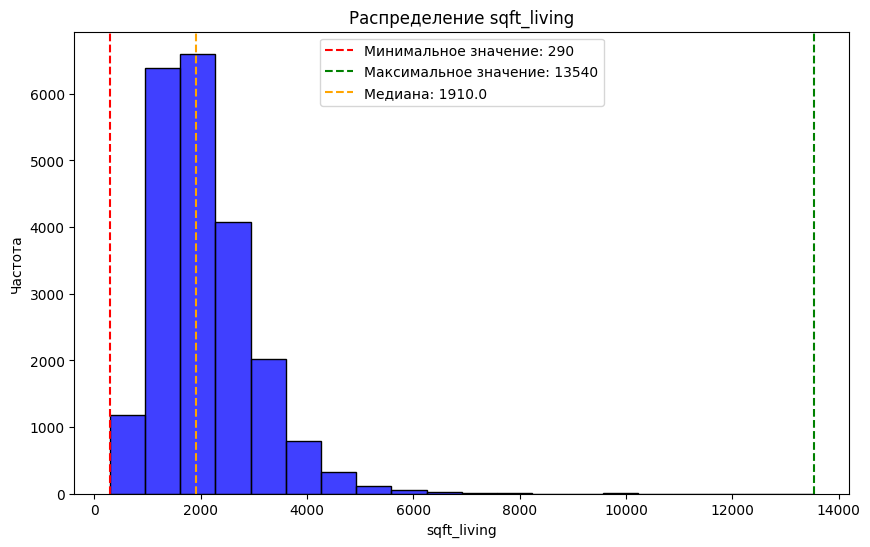

In [48]:
analyze_column(df, 'sqft_living')

plot_distribution(df['sqft_living'], bins=20)

Оценка наличия связи между ценой и жилой площадью

In [71]:
from scipy.stats import spearmanr

# Расчет корреляционной матрицы
correlation_table = df[['sqft_living', 'price']].corr(method='spearman')

# Вывод матрицы
print("Корреляционная таблица:")
print(correlation_table)

# Проверка значимости корреляций и вывод результатов
for i, col1 in enumerate(correlation_table.columns):
    for j, col2 in enumerate(correlation_table.columns):
        if i < j:  # Избегаем дублирования расчетов
            spearman_corr, p_value = spearmanr(df[col1], df[col2])
            print(f"Для {col1} и {col2}:")
            print(f"Коэффициент корреляции Спирмена: {spearman_corr:.1f}")
            print(f"p-значение: {p_value:.3f}")
            if abs(spearman_corr) > 0.5 and p_value < 0.05:
                print("Корреляция значима.")
            else:
                print("Корреляция не значима.")


Корреляционная таблица:
             sqft_living  price
sqft_living         1.00   0.64
price               0.64   1.00
Для sqft_living и price:
Коэффициент корреляции Спирмена: 0.6
p-значение: 0.000
Корреляция значима.



отмечается слабая прямая корреляция с высоким уровнем достоверности

# **распределение года постройки**

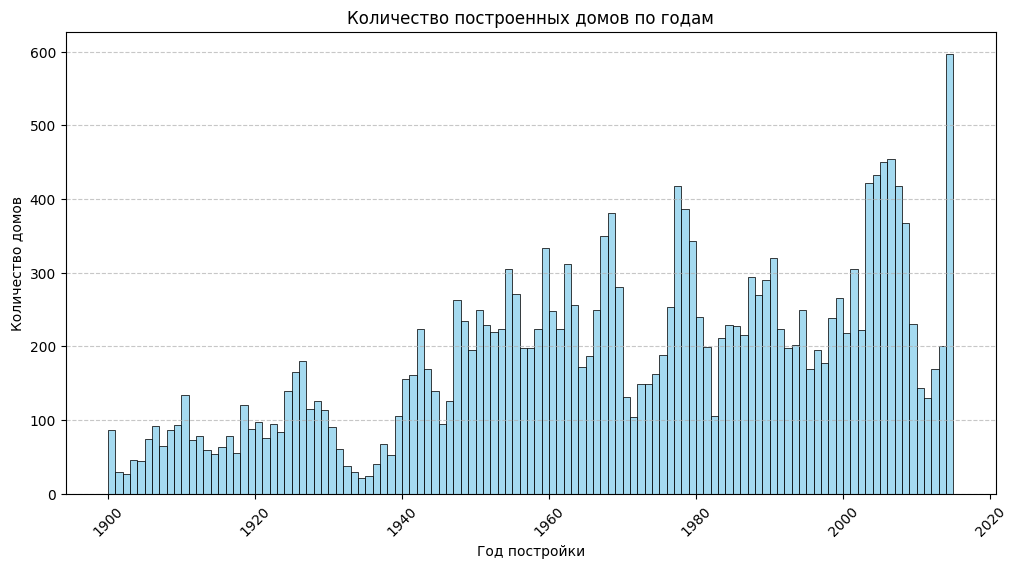

In [78]:
plt.figure(figsize=(12, 6))
sns.histplot(df['yr_built'], bins=range(df['yr_built'].min(), df['yr_built'].max() + 1), color='skyblue', edgecolor='black')
plt.title('Количество построенных домов по годам')
plt.xlabel('Год постройки')
plt.ylabel('Количество домов')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Добавление сетки по оси y
plt.show()

**Условие 2:**
* 2.1. Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы
* 2.2. Изучите распределение этажей домов
* 2.3. Изучите распределение состояния домов

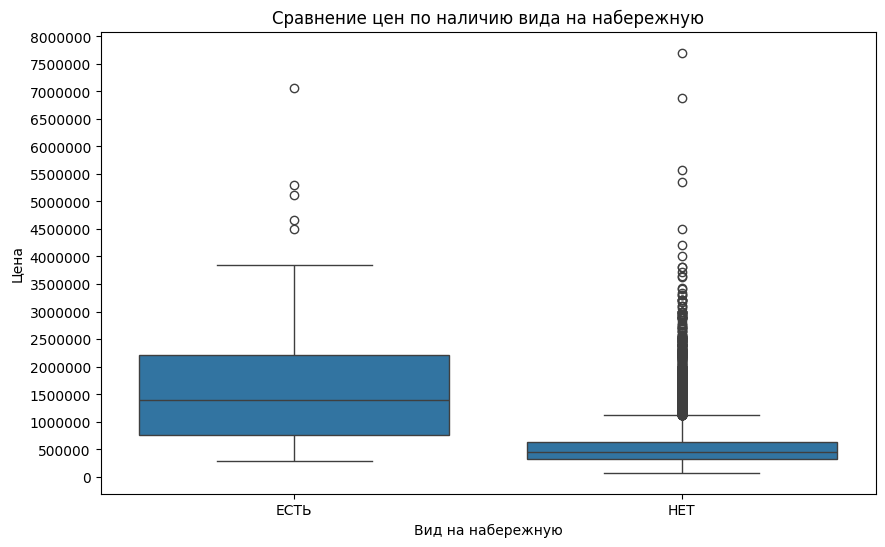

In [96]:
from matplotlib.ticker import FuncFormatter, MultipleLocator

# Создание датафрейма для построения ящика с усами
data = pd.DataFrame({'Waterfront': ['ЕСТЬ'] * len(with_waterfront) + ['НЕТ'] * len(without_waterfront),
                     'Price': np.concatenate([with_waterfront, without_waterfront])})

# Построение ящика с усами
plt.figure(figsize=(10, 6))
sns.boxplot(x='Waterfront', y='Price', data=data)

# Настройка формата вывода значений на оси y
formatter = FuncFormatter(lambda x, _: f'{x:.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Настройка шага оси y
plt.gca().yaxis.set_major_locator(MultipleLocator(500000))

plt.title('Сравнение цен по наличию вида на набережную')
plt.xlabel('Вид на набережную')
plt.ylabel('Цена')
plt.show()

In [98]:
from scipy.stats import mannwhitneyu

# Разделение данных на две группы: с видом на набережную и без
with_waterfront = df[df['waterfront'] == 1]['price']
without_waterfront = df[df['waterfront'] == 0]['price']

#  тест Манна-Уитни (цена не подчиняется нормальному распределению)
statistic, p_value = mannwhitneyu(with_waterfront, without_waterfront)

# Вывод результатов и проверка значимости
print("Статистика теста:", statistic)
print("p-значение: {:.3f}".format(p_value))  # Вывод без научной нотации
alpha = 0.05
if p_value < alpha:
    print("Разница в цене статистически значима")
else:
    print("Нет статистически значимой разницы в цене")

Статистика теста: 3090831.0
p-значение: 0.000
Разница в цене статистически значима


распределение этажей домов

1.00    10680
2.00     8241
1.50     1910
3.00      613
2.50      161
3.50        8
Name: floors, dtype: int64


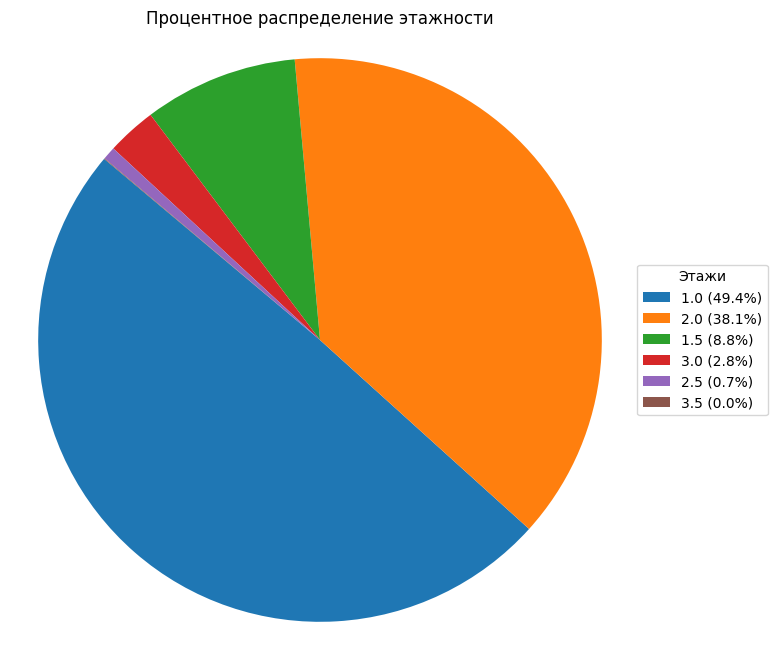

In [108]:
floors_counts = df['floors'].value_counts()
print(floors_counts)

total_count = floors_counts.sum()
legend_labels = [f'{floor} ({count/total_count*100:.1f}%)' for floor, count in floors_counts.items()]

# Построение круговой диаграммы без легенды на самой диаграмме
plt.figure(figsize=(8, 8))
plt.pie(floors_counts, labels=None, autopct=None, startangle=140)
plt.title('Процентное распределение этажности')
plt.axis('equal')  # Задаем равные пропорции для круговой диаграммы

# Создание легенды с процентным соотношением
plt.legend(legend_labels, title='Этажи', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Одноэтажная Калифорния...

**распределение состояния домов**

оценка значимости в цене по категориям

In [112]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Собираем данные в один массив
prices = np.concatenate([condition_1, condition_2, condition_3, condition_4, condition_5])

# Создаем метки для каждой группы
labels = ['condition_1'] * len(condition_1) + ['condition_2'] * len(condition_2) + \
         ['condition_3'] * len(condition_3) + ['condition_4'] * len(condition_4) + \
         ['condition_5'] * len(condition_5)

# Выполняем тест Тьюки
tukey_results = pairwise_tukeyhsd(prices, labels)

# Вывод результатов
print(tukey_results)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
   group1      group2     meandiff  p-adj     lower        upper    reject
--------------------------------------------------------------------------
condition_1 condition_2  -7144.5213    1.0 -204638.5896 190349.5469  False
condition_1 condition_3 207580.9115 0.0164   25146.6569 390015.1661   True
condition_1 condition_4 186768.7234 0.0423    4048.4729 369488.9739   True
condition_1 condition_5 277986.4227 0.0004   94146.8627 461825.9827   True
condition_2 condition_3 214725.4328    0.0   138150.834 291300.0316   True
condition_2 condition_4 193913.2447    0.0  116659.7538 271166.7356   True
condition_2 condition_5  285130.944    0.0  205266.0848 364995.8033   True
condition_3 condition_4 -20812.1881 0.0028   -36510.982  -5113.3942   True
condition_3 condition_5  70405.5112    0.0    44778.455  96032.5674   True
condition_4 condition_5  91217.6993    0.0   63628.2322 118807.1664   True
-------------------------

Графическое представление

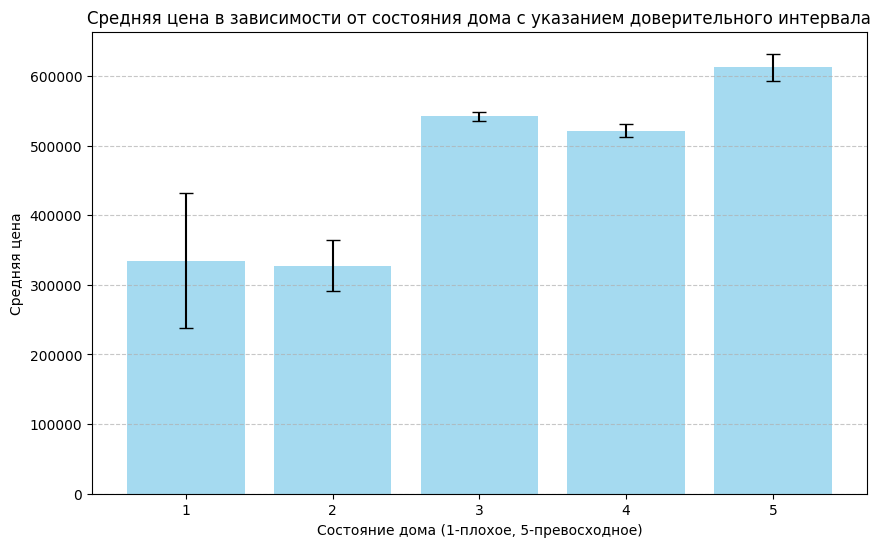

In [116]:
# Группировка данных по категориям состояния дома
grouped_data = df.groupby('condition')['price']

# Рассчет средней цены и стандартной ошибки среднего для каждой группы
mean_prices = grouped_data.mean()
std_errors = grouped_data.std() / np.sqrt(grouped_data.count())

# Построение диаграммы
plt.figure(figsize=(10, 6))
plt.bar(mean_prices.index, mean_prices, yerr=1.96 * std_errors, capsize=5, alpha=0.75, color='skyblue')
plt.title('Средняя цена в зависимости от состояния дома с указанием доверительного интервала')
plt.xlabel('Состояние дома (1-плохое, 5-превосходное)')
plt.ylabel('Средняя цена')

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Добавление сетки по оси y
plt.show()

разница в средней стоимости домов 1 и 2 категории статистически недостоверна (с учетом того, что цена не подчиняется закону нормального распредения, следует осторожно оценивать данную диаграмму)

**3 задача**

* Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
* Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.


# **Немного отклонился от поставленной задачи**

In [128]:
!pip install folium

*как выяснилось это не совсем калифорния...* после выполнения кода будут показаны позиции домов непосреддственно на карте (синим цветом указаны дома  с ценой ниже медианы, красным - выше). Получилось **далеко** не сразу

In [ ]:
import folium

#   цвет в зависимости от цены
def get_color(price, median_price):
    if price <= median_price:
        return 'blue'
    else:
        return 'red'

# Создание карты и добавление точек
m = folium.Map(location=[df['lat'].median(), df['long'].median()], zoom_start=10)

median_price = df['price'].median()
for index, row in df.iterrows():
    folium.CircleMarker(location=[row['lat'], row['long']],
                        radius=5,
                        color=get_color(row['price'], median_price),  # Определение цвета в зависимости от цены
                        fill=True,
                        fill_color=get_color(row['price'], median_price),
                        fill_opacity=0.5,
                        popup=f"Цена: {row['price']}"
                        ).add_to(m)

# Вывод карты
m